## Coupled NetLogo/SEAWAT model interface using the EMA Workbench

The code below presents the setup for an analysis of a coupled NetLogo/SEAWAT model through the EMA Workbench, using the simple "toy" case described in the paper. The run_model method of the NetLogoSEAWAT module can also be adapted for standalone use.

In [1]:
from NetLogoSEAWAT import ToyModel
  
from ema_workbench import (Model, RealParameter, Policy,
                           TimeSeriesOutcome, perform_experiments, ema_logging, MultiprocessingEvaluator)

from ema_workbench.em_framework.evaluators import LHS, SOBOL, MORRIS

from ema_workbench.util import ema_logging, load_results, save_results
from ema_workbench.analysis.plotting import lines
from ema_workbench.analysis.plotting_util import KDE

C:\Anaconda3\lib\importlib\_bootstrap.py:205: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)


In [2]:
#Set model parameters using an instance of the ToyModel_MSI class
class CoupledModel(ToyModel):

    netlogo_filename = 'ToyModel.nlogo' #Path to NetLogo model file
    swtexe_name = 'swt_v4.exe' #Path to SEAWAT executable file
    GUI = False #Display NetLogo GUI during runs 
    
    run_length = 120 #Total number of simulated coupled periods
    perlen = 30 #Length of each coupled simulation period (days)
    nper = 1 #Number of MODFLOW stress periods per coupled simulation period
    nstp = 1 #Number of MODFLOW time steps per stress period
    steady = True #Switch for steady-state/transient MODFLOW simulation

    #Layer parameters can be replaced by array structures for more detailed models - see FloPy documentation
    laytyp = 0
    ztop = -10.
    Laquifer = 20.
    dz = 20.
    zbot = ztop - Laquifer
     
    #Default grid parameters - see agent_functions for details
    dmin = 5
    dmax = 10
    nstep = 2
    grid_extents = [-200, 1200, -200, 1200] 
    
    #Default conductivities and porosity - can be handled as arrays for more detailed models
    HK = 40.
    VK = 10.
    PEFF = 0.3
    
    #Groundwater flow (m/year)
    gwflow_x = 0.
    gwflow_y = 0.
     
    #Other constants - used to calculate geohydrological parameters at runtime
    al = 1.
    trp_mult = 0.1
    kT_s = 3.
    kT_f = 0.61
    rho_solid = 2700.
    rho_f = 1000.
    Cp_f = 4183.
     
    #Lists of possible uncertain parameters for each component (not all parameters need to be sampled below)
    NetLogo_uncertainties = ['BuildThreshold','MinRadius']
    SEAWAT_uncertainties = ['HK']
     
     

    #Turn on logging
ema_logging.log_to_stderr(ema_logging.DEBUG)
     
# Policies can be used to directly set NetLogo or SEAWAT parameters. These parameters
# override the values that may have been set by uncertainties defined above.
# When running the model with an ensemble, the set of experiments is repeated
# for each policy
policies = [Policy('Radius 20', MinRadius=20),
            Policy('Radius 10', MinRadius=10)     
            ]  

    

fh = r'./coupled_model'

name = 'ToyModel'
model = CoupledModel(name, wd=fh, model_file='ToyModel.nlogo')

# Uncertainty ranges to be sampled (each parameter should be assigned to one of the NetLogo_uncertainties
# or SEAWAT_uncertainties lists above)
# Uncertainties override the default values given above
model.uncertainties = [
                    RealParameter('BuildThreshold', 2, 10),
                    RealParameter('HK', 10, 60)]
 
#NetLogo outcomes to be recorded
model.outcomes = [
                TimeSeriesOutcome('wells'),
                TimeSeriesOutcome('SubsurfaceUse'),
                TimeSeriesOutcome('MeanEff')    
                ]

# Run without an ensemble

# model.model_init(policy=policies[1])
# model.run_experiment(experiment=policies[1])
# results = model._handle_outcomes()


#Perform and record 16 experiments for each policy
n_experiments = 16
results = perform_experiments(model, scenarios=n_experiments)
#save_results(results, r'ToyModel16.tar.gz')


[MainProcess/DEBUG] setting working directory to C:\users\marcj\Workspace\Notebooks\ToyModel\coupled_model
[MainProcess/INFO] performing 16 scenarios * 1 policies * 1 model(s) = 16 experiments
[MainProcess/INFO] performing experiments sequentially
[MainProcess/DEBUG] running scenario 0 for policy None on model ToyModel
[MainProcess/DEBUG] calling run_model on SingleReplication
[MainProcess/DEBUG] calling run_model on AbstractModel
[MainProcess/DEBUG] calling initialized on AbstractModel
[MainProcess/DEBUG] completed calling initialized on AbstractModel
[MainProcess/DEBUG] calling model_init on AbstractModel
[MainProcess/DEBUG] completed calling model_init on AbstractModel
INFO:root:NetLogo started
INFO:root:Model opened
[MainProcess/DEBUG] calling _transform on AbstractModel
[MainProcess/DEBUG] completed calling _transform on AbstractModel
[MainProcess/DEBUG] calling _transform on AbstractModel
[MainProcess/DEBUG] completed calling _transform on AbstractModel
[MainProcess/DEBUG] comple

EMAError: exception in run_model
Caused by: TypeError: 'NoneType' object is not subscriptable

The EMA Workbench includes several plotting and analysis functions which can be used on the "results" structure. This structure is a tuple which contains two elements: a structured array corresponding to the sampled experiments, and a dictionary with the names of the outcomes as keys and an numpy array as value. The outcomes are recorded in the same order as the sampled experiments.

In [3]:
results

{'wells': array([16., 16., 16., 16., 16., 16., 16., 16., 16., 16., 16., 16., 16.,
        16., 16., 16., 16., 16., 16., 16., 16., 16., 16., 16., 16., 16.,
        16., 16., 16., 16., 16., 16., 16., 16., 16., 16., 16., 16., 16.,
        16., 16., 16., 16., 16., 16., 16., 16., 16., 16., 16., 22., 22.,
        22., 22., 22., 22., 22., 22., 22., 22., 22., 22., 22., 22., 22.,
        22., 22., 22., 22., 22., 22., 22., 22., 22., 22., 22., 22., 22.,
        22., 22., 22., 22., 22., 22., 22., 22., 22., 22., 22., 22., 22.,
        22., 22., 22., 22., 22., 22., 22., 22., 22., 22., 22., 22., 22.,
        22., 22., 22., 22., 22., 22., 22., 22., 22., 22., 22., 22., 22.,
        22., 22., 22., 16., 16., 16., 16., 16., 16., 16., 16., 16., 16.,
        16., 16., 16., 16., 16., 16., 16., 16., 16., 16., 16., 16., 16.,
        16., 16., 16., 16., 16., 16., 16., 16., 16., 16., 16., 16., 16.,
        16., 16., 16., 16., 16., 16., 16., 16., 16., 16., 16., 16., 16.,
        16., 20., 24., 32., 42., 54., 64.,

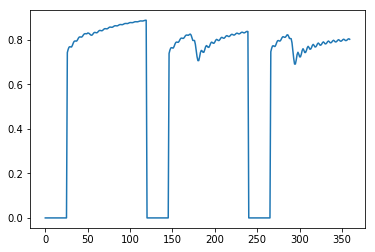

In [4]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1)
ax.plot(results['MeanEff'])
plt.show()